# Introduction

Human emotion recognition has always been the spotlight for many researchers. It can be applied to many industries and scenarios, helping us to test many theories, algorithms, and new technologies (Putra, W. B., & Arifin, F.,2019). And Emotion recognition can also be well used in the field of education. With the outbreak of the epidemic, many courses have been changed to online teaching, but this has also caused students and teachers to lose many opportunities for face-to-face communication. Students' grades also fluctuated to a certain extent due to changes in course teaching methods.

Therefore, emotional analysis can help teachers better understand students' ability to master the knowledge and their preferences for course content through students' facial recognition. In this way, the course setting can be adjusted more quickly by schools and teachers.

This dataset contains 35,685 examples of 48x48 pixel grayscale images of faces divided into train and test datasets. And there are 28709 examples in the train dataset and 6976 examples in the test dataset. There are seven categories in this dataset, and it is based on facial emotion images which are Happiness, Neutral, Sadness, Anger, Surprise, Disgust, and Fear.

In [ ]:
#Import related packages
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import pathlib
import datetime
import numpy as np 

2022-12-16 00:20:33.507382: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
#Specify the root directory, training data set , and test data set 
root_dir = '/root/autodl-nas/12_15/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

In [ ]:
#Check the number of files in the training set
data_dir = pathlib.Path("/root/autodl-nas/12_15/train")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
# classnames in the dataset specified
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
print(CLASS_NAMES)
# print length of class names
output_class_units = len(CLASS_NAMES)
print(output_class_units)

28709
['surprised' 'fearful' 'sad' 'neutral' 'angry' 'disgusted' 'happy']
7


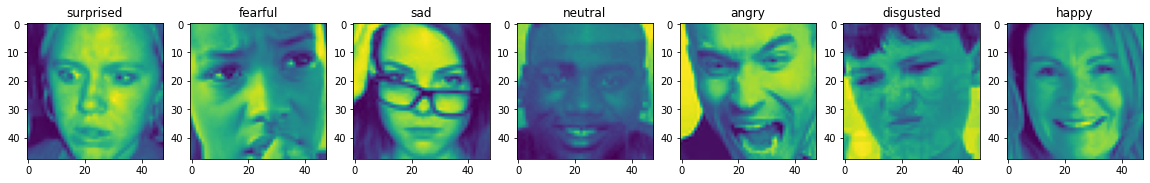

In [ ]:
# Check out one sample from each category 
import matplotlib.pyplot as plt
import os
fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(CLASS_NAMES)):
    d = train_dir+CLASS_NAMES[i]+'/'+os.listdir(train_dir+CLASS_NAMES[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(CLASS_NAMES[i])
plt.show()

# EDA

In this study, we examined the distribution of classes in the train and test datasets. We found that the 'disgusted' class is underrepresented, making up only 1.5% of the instances in both datasets, while the 'happy' class is much more prevalent, comprising 25.1% in the train dataset and 24.7% in the test dataset. This imbalance may cause the neural network to prioritize predicting the majority class during training, potentially leading to poor performance on the minority class. To address this, we recommend collecting more data on the underrepresented classes to improve their representation in the dataset.

To further improve the model's performance, we pre-processed the input images by rotating them 45 degrees and shifting their width and height by 0.15. These transformations were chosen to help the model recognize objects in different orientations and positions within an image. Additionally, we used a small scaling range as the input images are mostly the same size, which we believed would be sufficient to capture enough variation in the data. These pre-processing steps were intended to improve the generalization ability of the neural network. It is worth noting that the input images have a size of 48x48, and the GPU we used has a batch size limit of 64, which we took into account when designing our pre-processing pipeline.

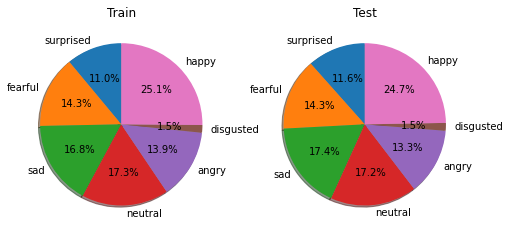

Emotion : surprised
	Training : 3171
	 Testing : 831
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : angry
	Training : 3995
	 Testing : 958
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : happy
	Training : 7215
	 Testing : 1774


In [ ]:
# Check the distribution of data in training and test sets
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in CLASS_NAMES ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in CLASS_NAMES ])
label = CLASS_NAMES
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in CLASS_NAMES:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1. / 255,
    rotation_range=45, #Random rotation angle number range
    width_shift_range=.15, # Width shift
    height_shift_range=.15, #height shift
    horizontal_flip=False, # Whether to randomly flip horizontally
    zoom_range=0.5,  # Range of random scaling
    ) 
test_idg = ImageDataGenerator(rescale=1./255)

In [ ]:
BATCH_SIZE = 64             # batch_size
IMG_HEIGHT = 48            # input Shape required by the model
IMG_WIDTH = 48             # input Shape required by the model
arg_train = {'target_size': (IMG_HEIGHT,IMG_WIDTH),
             'batch_size': BATCH_SIZE,
             'shuffle' : True,
            'classes' : list(CLASS_NAMES)}

arg_test = {'target_size': (IMG_HEIGHT,IMG_WIDTH),
            'batch_size': BATCH_SIZE,
            'shuffle': True,
            'classes' : list(CLASS_NAMES)}
train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#Fitting Model & Performance Tuning

When training the fully connected model for 20 epochs, we got training accuracy of 0.2479 and validation accuracy of 0.2894. For Convolutional Neural network architecture, we added 3 convolutional layers with activation as ‘relu’ and a max pool layer. The first training accuracy for CNN model is 0.5274 and validation accuracy is 0.5655.Subsequently, we tried various network architectures to in order to obtain better accuracy for the training dataset. We made some efforts to improve our models: adding more convolution layers, normalizing the bath size, maximizing the pool size, changing the learning rate in the Adam optimizer, changing the range of epochs. CNN with L1 training accuracy is 0.5292 and validation accuracy is 0.5666. CNN with L2 training accuracy is 0.5254 and validation accuracy is 0.5545. We also added dropouts, we got training accuracy of 0.4141 and validation accuracy of 0.5026 after adding dropouts. From the above results, CNN is better because the model have higher accuracy than FCNN.

2022-12-16 00:20:37.910377: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-16 00:20:37.963147: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:d1:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-12-16 00:20:37.963183: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-16 00:20:37.967101: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-16 00:20:37.967168: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-12-16 00:20:37.968323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcu

Epoch 1/20
449/449 [==============================] - 104s 229ms/step - loss: 2.3158 - accuracy: 0.1807 - val_loss: 1.9652 - val_accuracy: 0.2569
Epoch 2/20
449/449 [==============================] - 75s 166ms/step - loss: 2.1001 - accuracy: 0.2082 - val_loss: 1.7887 - val_accuracy: 0.2817
Epoch 3/20
449/449 [==============================] - 67s 149ms/step - loss: 2.0319 - accuracy: 0.2189 - val_loss: 1.7938 - val_accuracy: 0.2672
Epoch 4/20
449/449 [==============================] - 67s 150ms/step - loss: 1.9830 - accuracy: 0.2209 - val_loss: 1.7637 - val_accuracy: 0.2809
Epoch 5/20
449/449 [==============================] - 66s 147ms/step - loss: 1.9588 - accuracy: 0.2218 - val_loss: 1.7650 - val_accuracy: 0.2820
Epoch 6/20
449/449 [==============================] - 63s 139ms/step - loss: 1.9370 - accuracy: 0.2220 - val_loss: 1.7527 - val_accuracy: 0.2884
Epoch 7/20
449/449 [==============================] - 57s 126ms/step - loss: 1.9134 - accuracy: 0.2288 - val_loss: 1.7483 - val_a

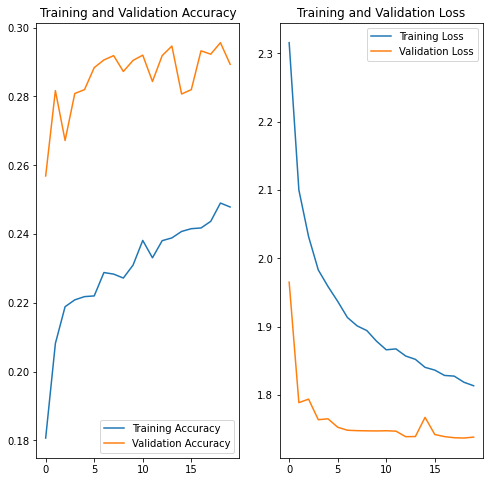

In [ ]:
# Regular multilayer fully connected (dense) networks
from keras.layers import Dense
from keras import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import regularizers
epochs = 20 
num_classes = len(CLASS_NAMES) 
#Build model
model= tf.keras.models.Sequential()
model.add(Flatten())  
model.add(Dense(512,activation = 'relu')) 
model.add(BatchNormalization()) 
model.add(Dropout(0.25)) 
    
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

# Add adam optimizer, the learning rate is 0.0001  
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

history = model.fit(x = train,epochs = 20,validation_data = test)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
BATCH_SIZE = 64             # batch_size
IMG_HEIGHT = 48            # input Shape required by the model
IMG_WIDTH = 48             # input Shape required by the model
arg_train = {'target_size': (IMG_HEIGHT,IMG_WIDTH),
             'batch_size': BATCH_SIZE,
             'shuffle' : True,
            'classes' : list(CLASS_NAMES)}

arg_test = {'target_size': (IMG_HEIGHT,IMG_WIDTH),
            'batch_size': BATCH_SIZE,
            'shuffle': True,
            'classes' : list(CLASS_NAMES)}
train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


2022-12-16 00:41:56.453368: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-12-16 00:41:57.311412: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101


Epoch 1/20
449/449 [==============================] - 61s 132ms/step - loss: 1.9757 - accuracy: 0.2315 - val_loss: 3.8802 - val_accuracy: 0.1587
Epoch 2/20
449/449 [==============================] - 56s 124ms/step - loss: 1.8027 - accuracy: 0.2745 - val_loss: 1.7427 - val_accuracy: 0.3169
Epoch 3/20
449/449 [==============================] - 59s 131ms/step - loss: 1.7515 - accuracy: 0.2952 - val_loss: 1.7360 - val_accuracy: 0.3083
Epoch 4/20
449/449 [==============================] - 57s 128ms/step - loss: 1.7139 - accuracy: 0.3118 - val_loss: 1.6083 - val_accuracy: 0.3716
Epoch 5/20
449/449 [==============================] - 59s 132ms/step - loss: 1.6773 - accuracy: 0.3304 - val_loss: 1.5338 - val_accuracy: 0.4094
Epoch 6/20
449/449 [==============================] - 60s 134ms/step - loss: 1.6274 - accuracy: 0.3554 - val_loss: 1.5021 - val_accuracy: 0.4161
Epoch 7/20
449/449 [==============================] - 60s 135ms/step - loss: 1.5687 - accuracy: 0.3873 - val_loss: 1.4557 - val_ac

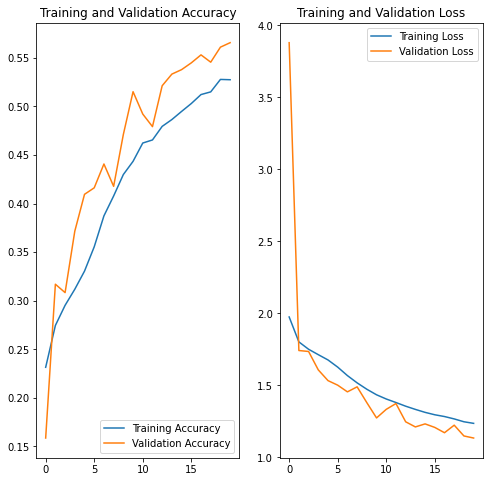

In [ ]:
# Convolutional Neural Networks
from keras.layers import Dense
from keras import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import regularizers
epochs = 20
num_classes = len(CLASS_NAMES)
#Build model
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' )) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
history = model.fit(x = train,epochs = 20,validation_data = test)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from kerastuner.tuners import RandomSearch
def build_model(hp):
  # Create the model
  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))


  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))


  model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))


  model.add(Flatten()) 
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())


  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dense(7, activation='softmax'))
 
  # Compile the model
  model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(
                  hp.Choice('learning_rate',
                            values=[1e-2, 1e-3, 1e-4])),
                metrics=['accuracy'])
  
  # Return the model
  return model

epochs = 20
#tuning, set the maximum number of attempts to 5
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='tuning_dir',
    project_name='machinecurve')


tuner.search_space_summary()
 
# Perform random search
tuner.search(train,
             epochs=5)

models = tuner.get_best_models(num_models=1)
best_model = models[0]
 
# Fit data to model
history = best_model.fit(x = train,epochs = 20)
 
# Generate generalization metrics
score = model.evaluate(test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Trial 3 Complete [00h 12m 12s]
accuracy: 0.3794628878434499

Best accuracy So Far: 0.3794628878434499
Total elapsed time: 00h 38m 08s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
449/449 [==============================] - 53s 115ms/step - loss: 1.4786 - accuracy: 0.4270
Epoch 2/20
449/449 [==============================] - 51s 114ms/step - loss: 1.4150 - accuracy: 0.4535
Epoch 3/20
449/449 [==============================] - 47s 104ms/step - loss: 1.3787 - accuracy: 0.4696
Epoch 4/20
449/449 [==============================] - 45s 101ms/step - loss: 1.3486 - accuracy: 0.4797
Epoch 5/20
449/449 [==============================] - 45s 100ms/step - loss: 1.3142 - accuracy: 0.4959
Epoch 6/20
449/449 [==============================] - 50s 112ms/step - loss: 1.2929 - accuracy: 0.5044
Epoch 7/20
449/449 [==============================] - 51s 114ms/step - loss: 1.2709 - accuracy: 0.5147
Epoch 8/20
449/449 [==============================] - 45s 101ms/step - loss: 1.2550 - accuracy: 0.5230
Epoc

Epoch 1/20
449/449 [==============================] - 59s 130ms/step - loss: 1.9649 - accuracy: 0.2269 - val_loss: 1.9854 - val_accuracy: 0.2175
Epoch 2/20
449/449 [==============================] - 60s 133ms/step - loss: 1.7996 - accuracy: 0.2731 - val_loss: 1.7230 - val_accuracy: 0.3213
Epoch 3/20
449/449 [==============================] - 55s 123ms/step - loss: 1.7505 - accuracy: 0.2973 - val_loss: 1.6942 - val_accuracy: 0.3295
Epoch 4/20
449/449 [==============================] - 51s 113ms/step - loss: 1.7108 - accuracy: 0.3145 - val_loss: 1.6417 - val_accuracy: 0.3638
Epoch 5/20
449/449 [==============================] - 52s 116ms/step - loss: 1.6670 - accuracy: 0.3421 - val_loss: 1.6683 - val_accuracy: 0.3553
Epoch 6/20
449/449 [==============================] - 57s 127ms/step - loss: 1.6228 - accuracy: 0.3597 - val_loss: 1.4753 - val_accuracy: 0.4416
Epoch 7/20
449/449 [==============================] - 46s 103ms/step - loss: 1.5701 - accuracy: 0.3832 - val_loss: 1.4514 - val_ac

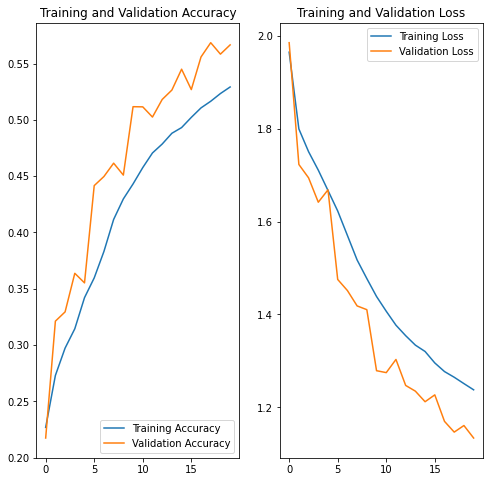

In [ ]:
# Try various network architectures
# This module added the L1 norm layer
# Convolutional Neural Networks
from keras.layers import Dense
from keras import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import regularizers
epochs = 20
num_classes = len(CLASS_NAMES)
#Build model
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l1(0.01))) #加入L1
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l1(0.01))) #加入L1
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
history = model.fit(x = train,epochs = 20,validation_data = test)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
449/449 [==============================] - 65s 142ms/step - loss: 1.9677 - accuracy: 0.2348 - val_loss: 2.4914 - val_accuracy: 0.2512
Epoch 2/20
449/449 [==============================] - 56s 125ms/step - loss: 1.8002 - accuracy: 0.2796 - val_loss: 1.6824 - val_accuracy: 0.3371
Epoch 3/20
449/449 [==============================] - 53s 117ms/step - loss: 1.7449 - accuracy: 0.2968 - val_loss: 1.7625 - val_accuracy: 0.2986
Epoch 4/20
449/449 [==============================] - 47s 105ms/step - loss: 1.7069 - accuracy: 0.3154 - val_loss: 1.5961 - val_accuracy: 0.3844
Epoch 5/20
449/449 [==============================] - 44s 98ms/step - loss: 1.6700 - accuracy: 0.3360 - val_loss: 1.5376 - val_accuracy: 0.4033
Epoch 6/20
449/449 [==============================] - 49s 109ms/step - loss: 1.6157 - accuracy: 0.3599 - val_loss: 1.5517 - val_accuracy: 0.4163
Epoch 7/20
449/449 [==============================] - 55s 123ms/step - loss: 1.5691 - accuracy: 0.3838 - val_loss: 1.4634 - val_acc

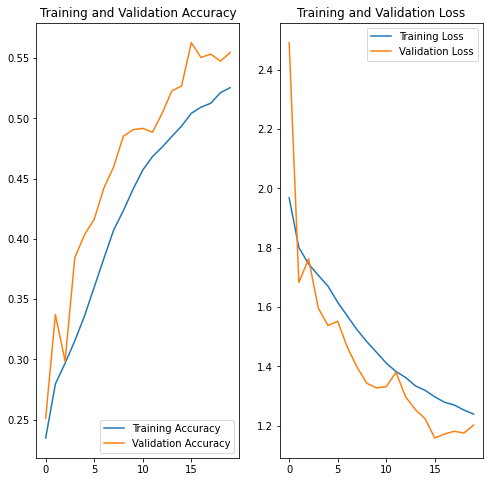

In [ ]:
# Try various network architectures
# This module added the L2 norm layer
from keras.layers import Dense
from keras import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import regularizers
epochs = 20
num_classes = len(CLASS_NAMES)
#Build model
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01))) #加入L2
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01))) #加入L2
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
history = model.fit(x = train,epochs = 20,validation_data = test)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
449/449 [==============================] - 51s 111ms/step - loss: 2.3326 - accuracy: 0.1864 - val_loss: 2.6577 - val_accuracy: 0.1647
Epoch 2/20
449/449 [==============================] - 51s 115ms/step - loss: 2.0941 - accuracy: 0.2116 - val_loss: 1.7911 - val_accuracy: 0.2778
Epoch 3/20
449/449 [==============================] - 45s 101ms/step - loss: 2.0267 - accuracy: 0.2212 - val_loss: 1.7365 - val_accuracy: 0.2877
Epoch 4/20
449/449 [==============================] - 55s 123ms/step - loss: 1.9761 - accuracy: 0.2306 - val_loss: 1.7660 - val_accuracy: 0.2800
Epoch 5/20
449/449 [==============================] - 55s 122ms/step - loss: 1.9337 - accuracy: 0.2418 - val_loss: 1.7553 - val_accuracy: 0.3008
Epoch 6/20
449/449 [==============================] - 52s 115ms/step - loss: 1.9098 - accuracy: 0.2461 - val_loss: 1.7102 - val_accuracy: 0.3084
Epoch 7/20
449/449 [==============================] - 44s 98ms/step - loss: 1.8847 - accuracy: 0.2524 - val_loss: 1.7018 - val_acc

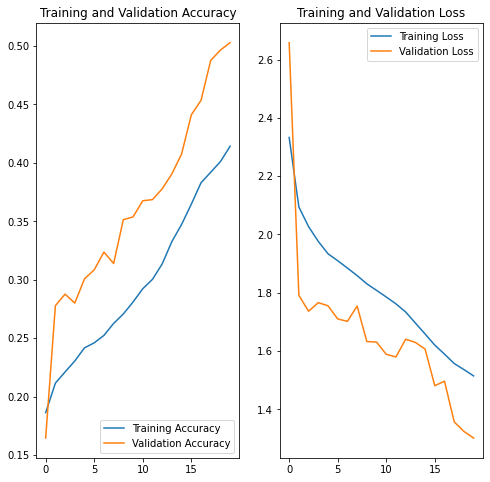

In [ ]:
# Try various network architectures
# Add dropouts
# Convolutional Neural Networks
from keras.layers import Dense
from keras import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import regularizers
epochs = 20
num_classes = len(CLASS_NAMES)
#Build model
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
history = model.fit(x = train,epochs = 20,validation_data = test)
model.evaluate(test)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sissi

# Transfer learning
In this part, we've tried three pre-trained CNNs: MobileNetV2, Resnet50 and VGG16.

## MobileNetV2

MobileNetV2 is a convolutional neural network (CNN) designed for efficient on-device mobile and embedded vision applications. 

The MobileNetV2 architecture is based on an inverted residual structure where the input and output of the residual block are thin bottleneck layers opposite to traditional residual models which use expanded representations in the input. MobileNetV2 uses lightweight depthwise convolutions to filter features in the intermediate expansion layer.

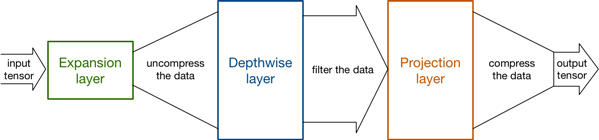



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______

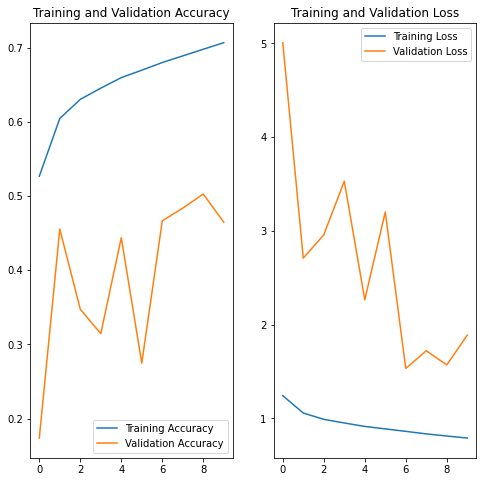

In [ ]:
#Transfer learning MobileNetV2    
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from matplotlib import pyplot as plt

#unsampling to 224*224
def grayscale_RGB_and_upsizing(image,size=[224,224]):
    image = tf.image.resize(tf.convert_to_tensor(image), size)

    return image
epochs = 10

#Load training and test sets, and perform data enhancement
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,preprocessing_function=grayscale_RGB_and_upsizing)
test_datagen=ImageDataGenerator(rescale=1/255,preprocessing_function=grayscale_RGB_and_upsizing)
train=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=64,
                                    
                                             class_mode='categorical')
test=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=64,
                                             
                                             class_mode='categorical')

#Load MobileNetV2
model=tf.keras.applications.MobileNetV2()
#Removing last layer 
ip=model.layers[0].input
op=model.layers[-2].output
#adding last layers 
final_output=keras.layers.Dense(128)(op)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(64)(final_output)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(7,activation='softmax')(final_output)
new_model=keras.Model(inputs =ip,outputs=final_output)
new_model.summary()
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=new_model.fit(train,epochs=10,validation_data=test,batch_size=32)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Resnet50

ResNet50 is a 50-layer deep CNN, with a large number of parameters, that has achieved very good performance on a variety of image classification and object detection tasks. 

One of the key features of ResNet50 is the use of residual connections. This helps to alleviate the problem of vanishing gradients, which can occur in very deep networks, and allows ResNet50 to learn more effectively.

Difference between residual block (Resnet50) and inverted residual block (MobileNetV2) is as follows:

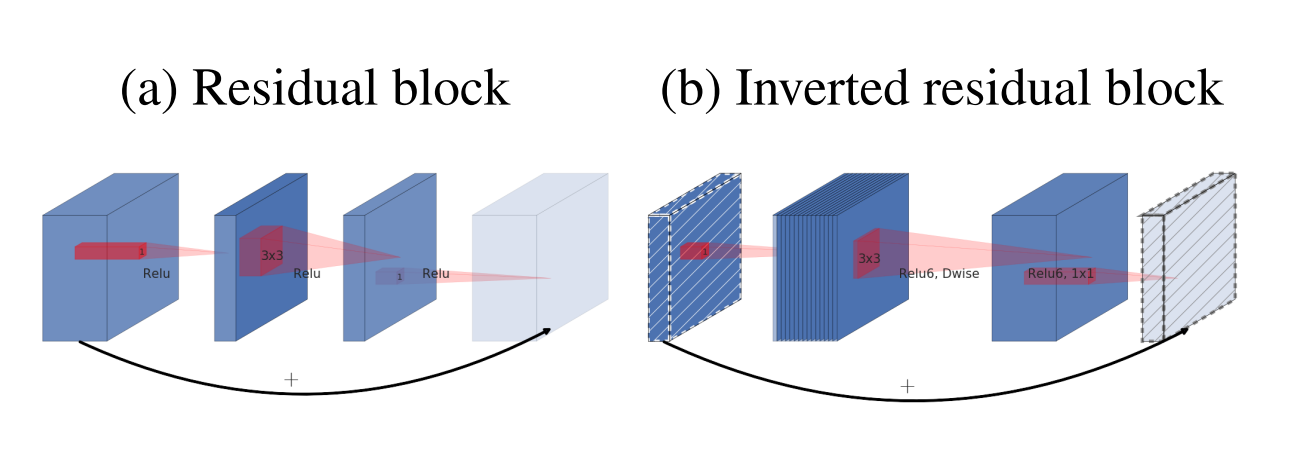

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______

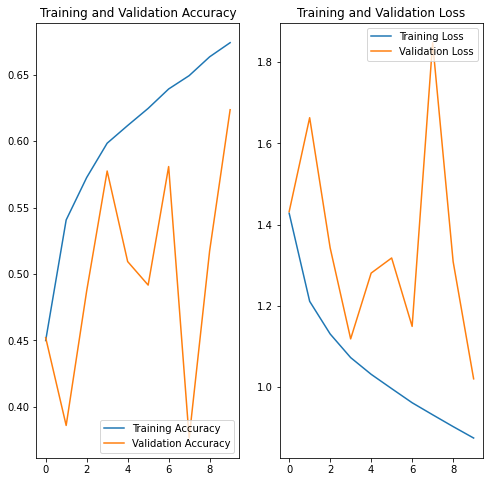

In [ ]:
#Transfer learning Resnet50 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from matplotlib import pyplot as plt
def grayscale_RGB_and_upsizing(image,size=[224,224]):
    image = tf.image.resize(tf.convert_to_tensor(image), size)

    return image
epochs = 10
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,preprocessing_function=grayscale_RGB_and_upsizing)
test_datagen=ImageDataGenerator(rescale=1/255,preprocessing_function=grayscale_RGB_and_upsizing)
train=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                    
                                             class_mode='categorical')
test=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             
                                             class_mode='categorical')

model=tf.keras.applications.resnet50.ResNet50()
#Removing last layer 
ip=model.layers[0].input
op=model.layers[-2].output
#adding last layers 
final_output=keras.layers.Dense(128)(op)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(64)(final_output)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(7,activation='softmax')(final_output)
new_model=keras.Model(inputs =ip,outputs=final_output)
new_model.summary()
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=new_model.fit(train,epochs=10,validation_data=test,batch_size=32)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## VGG16

VGG16 is a 16-layer CNN that has been trained on the ImageNet dataset, which contains over 1.2 million images and 1000 classes. 

VGG16 consists of 13 convolutional layers and 3 fully-connected layers, which allows it to learn rich and complex features from the input images. It also uses a simple and uniform architecture, with all convolutional layers having a kernel size of 3x3 and a stride of 1, which helps to reduce the number of model parameters and improve the network's ability to generalize.

There are some problems finishing running this model and print out the diagram of the model's performance, so we made a visualization using Excel.

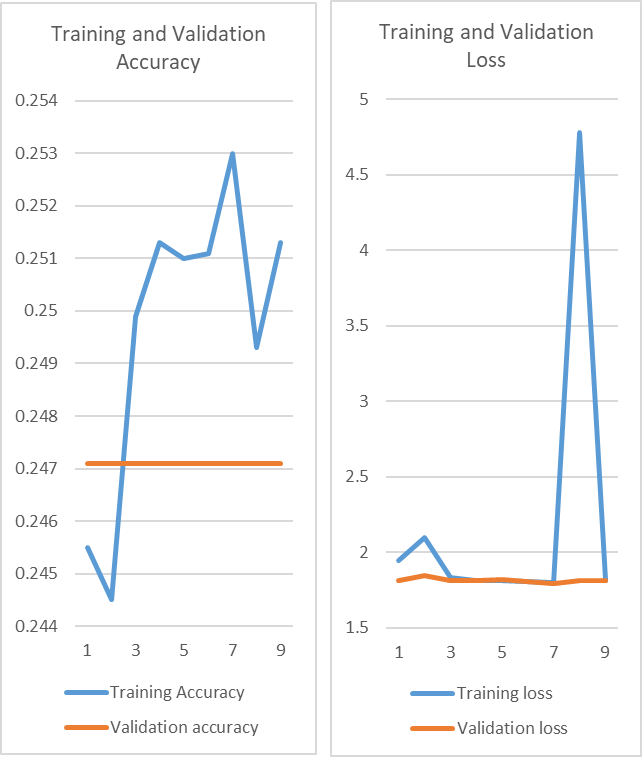

In [ ]:
#Transfer learning VGG16
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from matplotlib import pyplot as plt
def grayscale_RGB_and_upsizing(image,size=[224,224]):
    image = tf.image.resize(tf.convert_to_tensor(image), size)

    return image
epochs = 10
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,preprocessing_function=grayscale_RGB_and_upsizing)
test_datagen=ImageDataGenerator(rescale=1/255,preprocessing_function=grayscale_RGB_and_upsizing)
train=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                    
                                             class_mode='categorical')
test=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             
                                             class_mode='categorical')

model=tf.keras.applications.VGG16()
#Removing last layer 
ip=model.layers[0].input
op=model.layers[-2].output
#adding last layers 
final_output=keras.layers.Dense(128)(op)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(64)(final_output)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(7,activation='softmax')(final_output)
new_model=keras.Model(inputs =ip,outputs=final_output)
new_model.summary()
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=new_model.fit(train,epochs=10,validation_data=test,batch_size=32)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
________________________________________

# Conclusion

We found many methods to increase the accuracy:
1. Add more hidden layers or units 

   It help the model learn more complex patterns in the data, which can improve the model's accuracy. However, adding too many layers or units can lead to overfitting, which means the model performs well on the training data but poorly on unseen data.

2. Preprocess the data

   Normalizing or standardizing the features, can help the model converge faster during training.

3. Use a larger training dataset 
   
   It provides the model with more examples to learn.

4. Fine-tune the model's hyperparameters

   Adjusting the model's hyperparameters, such as the learning rate and the batch size, . Using a technique like grid search or random search can help find the best hyperparameter values for the model.

Summary table

\begin{array}{c} \hline
 & CNN & CNN with L1 & CNN with L2 & CNN with Dropout & MobileNetV2 & Resnet50 & VGG16 \\ \hline
Training Accuracy & 0.5274 & 0.5292 & 0.5254 & 0.4141 & 0.7068 & 0.6740 & 0.2513 \\
Validation Accuracy & 0.5655 & 0.5666 & 0.5545 & 0.5026 & 0.4646 & 0.6236 & 0.2471 \\ \hline
\end{array}

From the table, we could know MobileNetV2 performs best (0.7068) on training accuracy and ResNet50 performs best (0.6236) on validation accuracy.



# Reference
1.Putra, W. B., &amp; Arifin, F. (2019). Real-time emotion recognition system to monitor student’s mood in a classroom. Journal of Physics: Conference Series, 1413(1), 012021. https://doi.org/10.1088/1742-6596/1413/1/012021 

2.Ares. (2020, December 11). Emotion detection. Kaggle. Retrieved December 20, 2022, from https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

3.Sandler, M., Howard, A., Zhu, M., Zhmoginov, A., & Chen, L. C. (2018). Mobilenetv2: Inverted residuals and linear bottlenecks. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 4510-4520).

4.Hollemans, M. (no date) MobileNet version 2, Mobilenet version 2. Available at: https://machinethink.net/blog/mobilenet-v2/ (Accessed: December 20, 2022). 

5.Gupta, S., Kumar, P., & Tekchandani, R. K. (2022, September 9). Facial emotion recognition based real-time learner engagement detection system in online learning context using deep learning models - multimedia tools and applications. SpringerLink. Retrieved December 20, 2022, from https://link.springer.com/article/10.1007/s11042-022-13558-9 

6.Ramsundar, B., & Zadeh, R. B. (2018). TensorFlow for deep learning: from linear regression to reinforcement learning. " O'Reilly Media, Inc.".
